<a href="https://colab.research.google.com/github/mariasald/avd-2024-01/blob/main/Atividade_Pratica_6_GabrielCesar_MariaSaldanha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alunos**

* Gabriel César Tavares Ferreira - 21854868
* Maria Luiza Saldanha - 22153140

# Bibliotecas Utilizadas

In [ ]:
import numpy as np
import pandas as pd
from itertools import product
import itertools

# Tabelas de Sinais

In [ ]:
def tabela_de_sinais(k, repeticoes, valores):
    tabela = []
    headers = ["1"] + [chr(65+i) for i in range(k)]  # "1", "A", "B", "C", ...
    interactions = []

    for i in range(1, k+1):
        interactions.extend(itertools.combinations(range(1, k+1), i))

    for combination in itertools.product([-1, 1], repeat=k):
        linha = [1] + list(combination)
        for inter in interactions:
            product_term = 1
            for index in inter:
                product_term *= linha[index]
            linha.append(product_term)
        if repeticoes > 1:
            a = [float(input(f"Digite o valor do resultado {j+1} para a combinação {combination}: ")) for j in range(repeticoes)]
            linha.append(a)  # Y(1,2,3,...)
            linha.append(np.mean(a))  # Média de Y
        else:
            x = float(input(f"Digite o valor de resultados para a combinação {combination}: "))
            linha.append(x)  # Y
        tabela.append(linha)

    headers.extend([''.join(chr(65 + idx - 1) for idx in inter) for inter in interactions])
    headers.append("Y")
    if repeticoes > 1:
        headers.append("Y Média")
    return tabela, headers

def imprimir_tabela(tabela, headers):
    print("\n----------Tabela De Sinais--------------\n")
    print(" ".join(f"{col:^7}" for col in headers))
    for linha in tabela:
        print(" ".join(f"{val:^7}" if not isinstance(val, list) else f"{str(val):^7}" for val in linha))

def calcular_variacao_explicada(tabela, headers, repeticoes):
    df = pd.DataFrame(tabela, columns=headers)
    if repeticoes > 1:
        y_col = "Y Média"
    else:
        y_col = "Y"

    total_variation = np.var(df[y_col].apply(lambda x: np.mean(x) if isinstance(x, list) else x), ddof=1)
    factor_effects = {}
    factors = headers[1:-1]  # Exclui "1" e "Y" (e "Y Média" se existir)

    for factor in factors:
        if isinstance(df[factor][0], list):
            level_means = df.explode(factor)
            level_means[y_col] = level_means[y_col].apply(lambda x: np.mean(x) if isinstance(x, list) else x)
            level_means = level_means.groupby(factor)[y_col].mean()
            factor_effect = (level_means[1] - level_means[-1]) / 2
        else:
            level_means = df.groupby(factor)[y_col].mean()
            factor_effect = (level_means[1] - level_means[-1]) / 2
        factor_effects[factor] = factor_effect

    explained_variation = {factor: effect**2 / total_variation for factor, effect in factor_effects.items()}
    explained_variation_fraction = {factor: var / total_variation for factor, var in explained_variation.items()}

    print("\nFração de Variação Explicada por cada Fator:")
    for factor, fraction in explained_variation_fraction.items():
        print(f"{factor}: {fraction:.2f}")



###tabela_de_sinais
Recebe o número de fatores k e o número de repetições. Calcula todas as combinações de interações entre fatores e gera todas as combinações possíveis de níveis dos fatores (-1 e 1). Se houver repetições, a função calcula a média dos resultados.

###calcular_variacao_explicada
Recebe a tabela de dados, os cabeçalhos e o número de repetições. Ela converte a tabela e calcula a variação total dos resultados. Calcula os efeitos de cada fator e a variação explicada por cada um.

# Implementar em Python o projeto de experimentos do tipo $2^k$ fatorial.



a) O usuário deve escolher a quantidade de fatores entre k=2 e k=5;

In [ ]:
 while True:
  try:
    k = int(input("Informe a quantidade de fatores k (entre 2 e 5): "))
    if 2 <= k <= 5:
      break
    else:
      print("Fora do limite")
  except ValueError:
    print("Número inválido.")

Informe a quantidade de fatores k (entre 2 e 5): 2


Escolha da quantidade de fatores:

O experimento fatorial 2k significa que cada fator pode ter dois níveis (-1 e 1), e podemos ter um total de 2k combinações possíveis.
O usuário deve escolher o número de fatores k entre 2 e 5.

b) O usuário deve informar o maior valor (+1) e o menor valor (-1) de cada fator;


In [ ]:
valores = []
for i in range(k):
    while True:
        try:
            max_val = float(input(f"Informe o maior valor (+1) para o fator {chr(65+i)}: "))
            min_val = float(input(f"Informe o menor valor (-1) para o fator {chr(65+i)}: "))
            valores.append((min_val, max_val))
            break
        except ValueError:
            print("Valor inválido.")


Informe o maior valor (+1) para o fator A: 2
Informe o menor valor (-1) para o fator A: 1
Informe o maior valor (+1) para o fator B: 3
Informe o menor valor (-1) para o fator B: 2


Para cada fator, solicitamos os valores máximo (+1) e mínimo (-1) para os fatores. Os valores inseridos são guardads em uma lista, que contem as tuplas de valores mínimo e máximo para cada fator.

c)  O usuário deve informar quantas vezes cada execução piloto será repetida.

In [ ]:
while True:
  try:
    repeticoes = int(input("Informe a quantidade de repetições: "))
    break
  except ValueError:
    print("Número inválido.")

Informe a quantidade de repetições: 3


No experimento 2k fatorial, a quantidade de repetições se refere ao número de vezes que cada combinação de configurações dos fatores será executada.

d) A aplicação deve exibir a tabela de sinais;


e) O usuário deve informar o(s) resultado(s) de uma execução piloto com aquela combinação;

In [ ]:
tabela, headers = tabela_de_sinais(k, repeticoes, valores)
imprimir_tabela(tabela, headers)

Digite o valor do resultado 1 para a combinação (-1, -1): 1
Digite o valor do resultado 2 para a combinação (-1, -1): 2
Digite o valor do resultado 3 para a combinação (-1, -1): 3
Digite o valor do resultado 1 para a combinação (-1, 1): 4
Digite o valor do resultado 2 para a combinação (-1, 1): 5
Digite o valor do resultado 3 para a combinação (-1, 1): 6
Digite o valor do resultado 1 para a combinação (1, -1): 7
Digite o valor do resultado 2 para a combinação (1, -1): 8
Digite o valor do resultado 3 para a combinação (1, -1): 9
Digite o valor do resultado 1 para a combinação (1, 1): 4
Digite o valor do resultado 2 para a combinação (1, 1): 3
Digite o valor do resultado 3 para a combinação (1, 1): 5

----------Tabela De Sinais--------------

   1       A       B       A       B      AB       Y    Y Média
   1      -1      -1      -1      -1       1    [1.0, 2.0, 3.0]   2.0  
   1      -1       1      -1       1      -1    [4.0, 5.0, 6.0]   5.0  
   1       1      -1       1      -1     

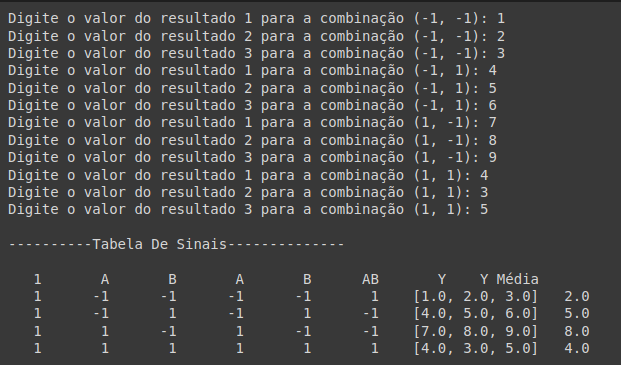

- A, B: níveis dos fatores.
- AB: interação entre A e B.
- Y: resultados para cada combinação.
- Y media: media dos resultados.
- Média dos valores: a média dos valores observados para cada combinação é calculada para fornecer uma medida de tendência central


f) A aplicação deve mostrar a fração de variação explicada por cada fator.

In [ ]:
calcular_variacao_explicada(tabela, headers, repeticoes)

KeyError: 0